# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Reading Dataset

In [2]:
df=pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Note
Here sales is target variable and rest are indpendent variables

# Data Analysis

In [4]:
df.shape

(200, 4)

In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
ft=[i for i in df if i !="Sales"]

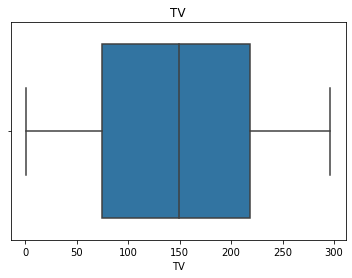

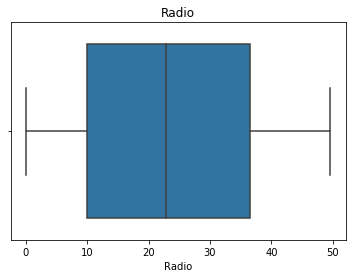

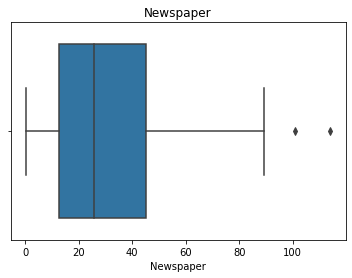

In [8]:
for i in df[ft]:
    sns.boxplot(x=i,data=df)
    plt.title(i)
    plt.show()

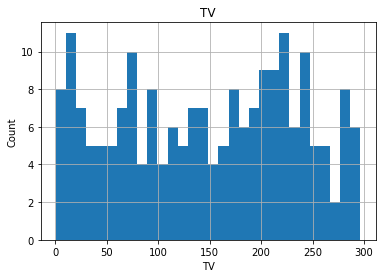

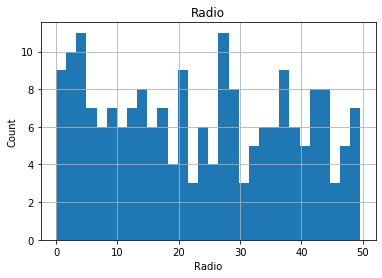

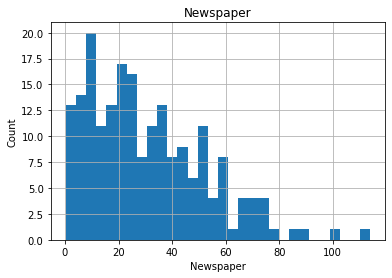

In [60]:
for i in df[ft]:
    df[i].hist(bins=30)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()

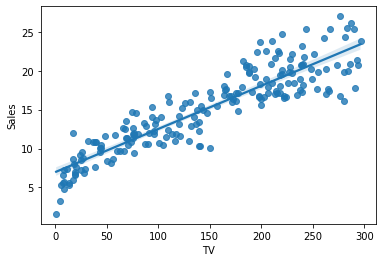

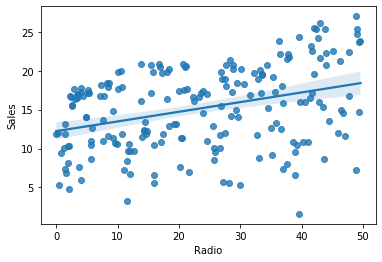

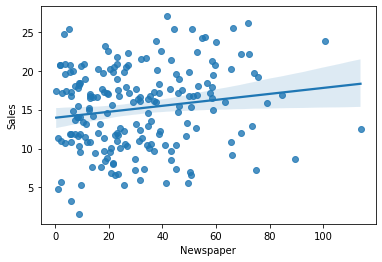

In [10]:
for i in df[ft]:
    sns.regplot(x=i,y="Sales",data=df)
    plt.xlabel(i)
    plt.ylabel("Sales")
    plt.show()

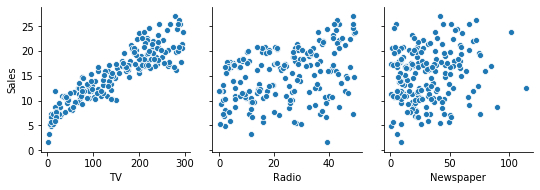

In [11]:
# Alternatively we can do
sns.pairplot(data=df,x_vars=ft,y_vars="Sales")

# Check for coreation as well

In [12]:

corrs=df.corr()
corrs

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [13]:
corrs.columns[1]

'Radio'

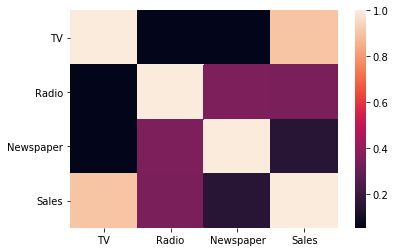

In [14]:
sns.heatmap(df.corr())

# In case when we have lot of variable heat map wont work so we use this fucntion

In [15]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [16]:
correlation(df,.3)

{'Newspaper', 'Sales'}

# Buiding the model

In [17]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

# Steps are:-
  * Create X and Y
  * Create train and test set and the ratios are 70% and 30%
  * Train your model on training set
  * Evaluate the model(Traing set ,test set)
  

### lets try with one varibale

In [18]:
X=df["TV"]
y=df["Sales"]

In [19]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)

### random_state 
    * It is used because everytime the sampling is de=ifferent in case to fix the samples we use random_sate if we change the random_state=100 then again the samples changes

In [20]:
print(X_train.shape)
print("_"*66)
print(X_test.shape)
print("_"*66)
print(y_train.shape)
print("_"*66)
print(y_test.shape)

(140,)
__________________________________________________________________
(60,)
__________________________________________________________________
(140,)
__________________________________________________________________
(60,)


## Training the model
# 1- Using stats model

#### We know equation og linear regression is Y=mx+c, but stas model exclude c(intercept) we have to explicitly add the intercept to it

In [21]:
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [22]:
# Fitting the model
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

## Model
##### sales= 6.9486 + 0.0545 * T .V

In [23]:
# to acess all other details
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           1.52e-52
Time:                        14:12:32   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Observations
    * Here p value is low i.e 0.00 means the coeff obtained are significant they are not obtained by chance model beleive that they are statsitically significant
    * if value of p =0.50 it means the coeff obtained are by chance they are not statistically significant
    * R sqaure =.81 it means 81% of the varaince in sales is explaned by the Variable T.V
    * Prob (F-statistic):	1.52e-52 clos to zero means model fit is quite significant

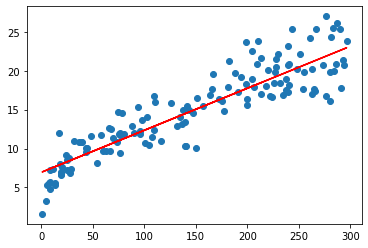

In [24]:
# Evaluation of model
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948+0.054*X_train,'r')
plt.show()

# Residual Analysis
Used in regression only

# Note
###### 6.948 + 0.054 * X_train is equal to lr_model also we know residual = y - y_predicted

In [25]:
y_train_pred=lr_model.predict(X_train_sm)
y_train_pred.head()

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
dtype: float64

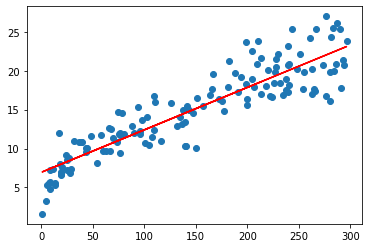

In [26]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_pred,'r')
plt.show()

Text(0.5, 1.0, 'Residual Plot')

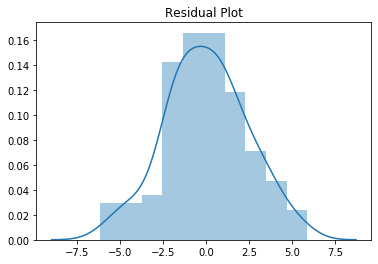

In [27]:
res=y_train-y_train_pred
# plot the residual
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

## To check if the residual is normal distributed or not we use Q-Q plot

In [28]:
import scipy.stats as stat
import pylab

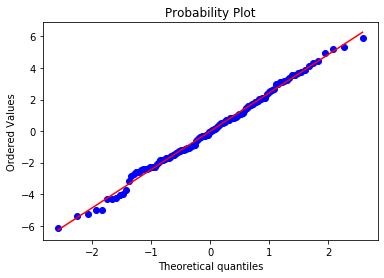

In [29]:
stat.probplot(res,dist="norm",plot=pylab)
plt.show()

## Observation
     * Since its a straight line its normal distrubuted

### Look for patterns in residuals(we do not able to identify any patterns, if there is any then our model is not correct)

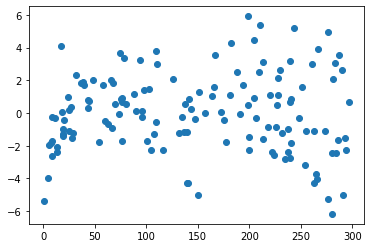

In [30]:
plt.scatter(X_train,res)
plt.show()

# Step 4 Making predictions and Evalutaions om the test set

In [31]:
# Making predictions on the test set(y_test_pred)
# Evaluate the model, r-squared on the test

In [32]:
# Pred on test data
y_test_pred=lr_model.predict(X_test)

ValueError: shapes (1,60) and (2,) not aligned: 60 (dim 1) != 2 (dim 0)

### Its is giving error as X_test dont have that constant varibale "C"i.e Intercept

In [33]:
X_test_sm=sm.add_constant(X_test)
# Pred on test data
y_test_pred=lr_model.predict(X_test_sm)

In [34]:
from sklearn.metrics import mean_squared_error,r2_score

In [35]:
# Calculate r square on test
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.7921031601245657

In [36]:
# Calculate r square on train
r2_train=r2_score(y_true=y_train,y_pred=y_train_pred)
r2_train

0.8157933136480389

# Train r sqaure is same as what we get in X traing

# Note
### Anything witin +-5 % range of train is good so the range of test and train is under 5% i.e 81%-79%=2% so its a good score

In [37]:
# Means square Error
mean_squared_error(y_true=y_train,y_pred=y_train_pred)

5.752400386486836

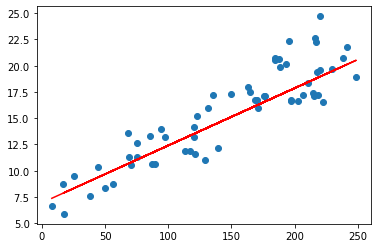

In [38]:
# Evaluate
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()

# 2 Linear Regression using SK Learn

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)

In [42]:
# If we do
lm=LinearRegression()
lm.fit(X_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[213.4 151.5 205.  142.9 134.3  80.2 239.8  88.3  19.4 225.8 136.2  25.1
  38.  172.5 109.8 240.1 232.1  66.1 218.4 234.5  23.8  67.8 296.4 141.3
 175.1 220.5  76.4 253.8 191.1 287.6 100.4 228.  125.7  74.7  57.5 262.7
 262.9 237.4 227.2 199.8 228.3 290.7 276.9 199.8 239.3  73.4 284.3 147.3
 224.  198.9 276.7  13.2  11.7 280.2  39.5 265.6  27.5 280.7  78.2 163.3
 213.5 293.6  18.7  75.5 166.8  44.7 109.8   8.7 266.9 206.9 149.8  19.6
  36.9 199.1 265.2 165.6 140.3 230.1   5.4  17.9 237.4 286.   93.9 292.9
  25.   97.5  26.8 281.4  69.2  43.1 255.4 239.9 209.6   7.3 240.1 102.7
 243.2 137.9  18.8  17.2  76.4 139.5 261.3  66.9  48.3 177.   28.6 180.8
 222.4 193.7  59.6 131.7   8.4  13.1   4.1   0.7  76.3 250.9 273.7  96.2
 210.8  53.5  90.4 104.6 283.6  95.7 204.1  31.5 182.6 289.7 156.6 107.4
  43.  248.4 116.  110.7 187.9 139.3  62.3   8.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#### We are getting the error as shape is 1 D but Expected 2D array, got 1D array instead

In [43]:
X_train.shape

(140,)

In [44]:
# so we have to convert it into 2D
X_train_lm=X_train.values.reshape(-1,1)
X_train_lm.shape

(140, 1)

In [45]:
#Same we do for test data
X_test_lm=X_test.values.reshape(-1,1)
X_test_lm.shape

(60, 1)

In [46]:
# for Revesion
n1=np.arange(12).reshape(-1,1)
n1.shape

(12, 1)

In [47]:
# steps in SK learn
# 1- Create the object of linear regression
lm=LinearRegression()
# 2- fit the model
lm.fit(X_train_lm,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
# 3- See the params, make predictions(train,test)
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.94868320000136


In [49]:
# Make predictions
y_train_pred=lm.predict(X_train_lm)
y_test_pred=lm.predict(X_test_lm)

In [50]:
# 4- Evaluate the model(r2,etc.)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8157933136480388
0.792103160124566


# Check for Newpaper and Radiao as well

## 1-USing SKlearn model

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
X=df["Radio"]
y=df["Sales"]

# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)

In [115]:
# reshaping the variable
x_train_re=X_train.values.reshape(-1,1)

In [116]:
lr.fit(x_train_re,y_train)
print(lr.coef_)
print(lr.intercept_)

[0.12391987]
12.164674278168622


In [119]:
# Make predictions
y_train_pred=lr.predict(x_train_re)
# 4- Evaluate the model(r2,etc.)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

0.11188119510677019


# Using OLS model for Newspaper

In [121]:
X=df["Newspaper"]
y=df["Sales"]

# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)

In [126]:
# Add constant
X_train_ct=sm.add_constant(X_train)
X_train_ct.head()

,const,Newspaper
74,1.0,13.1
3,1.0,58.5
185,1.0,19.6
26,1.0,12.6
90,1.0,9.3


In [132]:
lm=sm.OLS(y_train,X_train_ct).fit()
lm.params

const        13.132714
Newspaper     0.059574
dtype: float64

## *** Note*** Below is the wrong way always put dependent variable first in OLS

In [131]:
#lm=sm.OLS(X_train_ct,y_train).fit()
#lm.params

,0,1
Sales,0.058525,1.958127


In [134]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     8.461
Date:                Fri, 17 Sep 2021   Prob (F-statistic):            0.00423
Time:                        16:08:00   Log-Likelihood:                -435.38
No. Observations:                 140   AIC:                             874.8
Df Residuals:                     138   BIC:                             880.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1327      0.792     16.574      0.000      11.566      14.699
Newspaper      0.0596      0.020      2.909      0.004       0.019       0.100
==============================================================================
Omnibus:                        9.229   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                3.890
Skew:                          -0.073   Prob(JB):                        0.143
Kurtosis:                       2.196   Cond. No.                         66.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
y_train_pred=lm.predict(X_train_ct)
y_train_pred.head()

74     13.913131
3      16.617781
185    14.300361
26     13.883344
90     13.686750
dtype: float64

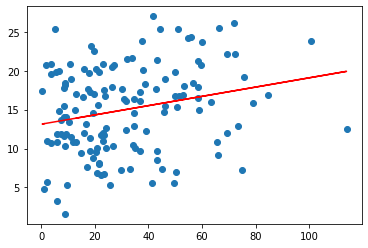

In [138]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_pred,"r")
plt.show()